## Introduction:

#### Context:

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had

#### Content:
This dataset contains the LEGO Parts/Sets/Colors and Inventories of every official LEGO set in the Rebrickable database. These files are current as of July 2017.

#### Acknowledgements:
This dataset was compiled by Rebrickable, which is a website to help identify what LEGO sets can be built given bricks and pieces from other LEGO sets and made available on Kaggle at the following [link](https://www.kaggle.com/datasets/rtatman/lego-database). 

#### Dataset Description:

The dataset contains 8 tables that are linked to each other through one or more relationships per the following schema:

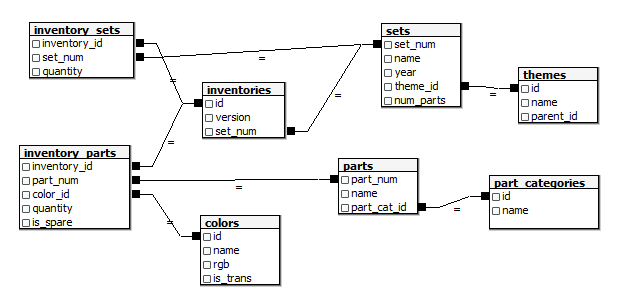



## Data Import:

In [1]:
#importing libraries

import pandas as pd
import numpy as np

In [2]:
sets_df = pd.read_csv('../5. Python - pandas - Data Manipulation/data/sets.csv')
themes_df = pd.read_csv('../5. Python - pandas - Data Manipulation/data/themes.csv')

## Data Exploration:

To start with the project, I will explore the `sets` and `themes` tables first.

In [3]:
display(sets_df.head())
display(themes_df.head())


,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [4]:
display(sets_df.info())
display(themes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11673 entries, 0 to 11672
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    11673 non-null  object
 1   name       11673 non-null  object
 2   year       11673 non-null  int64 
 3   theme_id   11673 non-null  int64 
 4   num_parts  11673 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 456.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         614 non-null    int64  
 1   name       614 non-null    object 
 2   parent_id  503 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ KB


None

The `sets` table has 5 columns and 11,673 rows with no missing values - this is a relatively clean data table.

The `themes` table has 3 columns and 614 rows with 111 missing values in the `parent_id` column.

Out of curiosity, I'm inspecting all the names of the available themes. LEGO seems to have quite a large selection of themes.

In [14]:
themes_df.name.unique()

array(['Technic', 'Arctic Technic', 'Competition', 'Expert Builder',
       'Model', 'Airport', 'Construction', 'Farm', 'Fire', 'Harbor',
       'Off-Road', 'Race', 'Riding Cycle', 'Robot', 'Traffic',
       'RoboRiders', 'Speed Slammers', 'Star Wars', 'Supplemental',
       'Throwbot Slizer', 'Universal Building Set', 'Creator',
       'Basic Model', 'Castle', 'Train', 'Creature', 'Food & Drink',
       'Building', 'Cargo', 'Basic Set', 'Recreation', 'Mecha', 'Town',
       'Arctic', 'City', 'Coast Guard', 'Hospital', 'Police', 'Trains',
       'Classic Town', 'Station', 'Post Office', 'Divers', 'Extreme Team',
       'Launch Command', 'Outback', 'Paradisa', 'Res-Q', 'Space Port',
       'Town Jr.', 'Gas Station', 'Town Plan', 'World City', 'Racers',
       'Drome Racers', 'Ferrari', 'Lamborghini', 'Power Racers',
       'Radio Control', 'Speed Racer', 'Tiny Turbos', 'Track System',
       'Williams F1', 'World Racers', 'Xalax', 'Space', 'Alien Conquest',
       'Blacktron I', 'Blackt

In [15]:
themes_df.name.value_counts()

Supplemental             18
Fire                     12
Airport                  11
Traffic                   9
Harbor                    9
                         ..
Studios                   1
SpongeBob SquarePants     1
Prince of Persia          1
Ben 10                    1
Freemakers                1
Name: name, Length: 402, dtype: int64

So it seems that there are some themes that have the same name but different ids.

In [19]:
themes_df[themes_df.name == 'Supplemental'].head()

,id,name,parent_id
18,19,Supplemental,1.0
47,48,Supplemental,22.0
61,62,Supplemental,52.0
83,84,Supplemental,67.0
101,102,Supplemental,94.0


##### Question 1: How many sets does each theme have released? By year?

To answer this question, one option is to join the 2 tables and aggregate the relevant data.

In [7]:
sets_themes_df = sets_df.merge(themes_df, how = 'left', left_on = 'theme_id', right_on = 'id', suffixes = ('_sets', '_themes'))
display(sets_themes_df.head())

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id
0,00-1,Weetabix Castle,1970,414,471,414,Castle,411.0
1,0011-2,Town Mini-Figures,1978,84,12,84,Supplemental,67.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2,199,Lion Knights,186.0
3,0012-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0
4,0013-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0
